In [1]:
import pandas as pd
df=pd.read_csv('Downloads/DS1_C8_Computers_Data_Project.csv')
df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads_2022,ads_2023,trend
0,1,1499,25,80,4,14,no,no,yes,94,94,1
1,2,1795,33,85,2,14,no,no,yes,94,94,1
2,3,1595,25,170,4,15,no,no,yes,94,94,1
3,4,1849,25,170,8,14,no,no,no,94,94,1
4,5,3295,33,340,16,14,no,no,yes,94,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,70,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,70,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,70,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,70,35


# 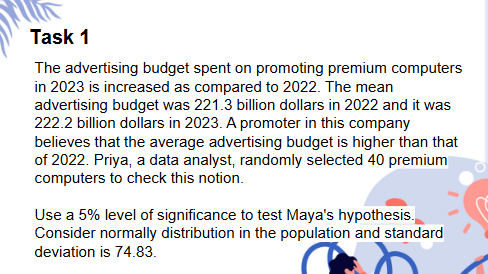

# h0:the mean advertising budget is lesser or equal to 2022
# h1:the mean advertising  budget is higher than 2022.
# h0:<=221.3 billion
# h1:>221.3 billion
# one sided right test


In [4]:
# mean of the population
p_mean=221.3
p_sd=74.83
sample_size=40
# since sample sze>30 we and sd is known we have chose  z_test to do this task.
alpha=0.05 #5 % significance level(as per the q).
sample_data=df.sample(n=40,random_state=1)


In [5]:
import math
from scipy.stats import norm
s_mean=sample_data['ads_2022'].mean()



In [6]:
x=s_mean# sample mean
mu=p_mean # population mean
s=p_sd# population std
n=sample_size # sample size
alpha=alpha# significance level
z_statistics=(x-mu)/(s/math.sqrt(n))
p_value=norm.sf(abs(z_statistics))
z_critical=norm.ppf(1-alpha)# 1- alpha since it is one sided right tailed test


# let's check the decision rule
# 1)p_value<alpha:reject of null hypothesis
# 2)-z critical>z_statistics>+z_critical:reject of null hypothesis

In [8]:
p_value<alpha

False

In [9]:
z_statistics>z_critical

False

# since both are false we accept the  the null hypothesis this means the mean budget of advertisement is either less or equal to 221.3 billion.

# 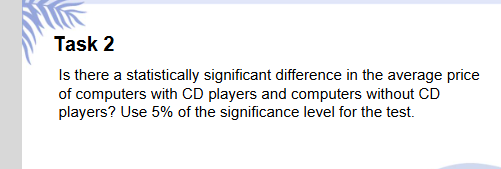

# ho:there is not a significant  difference in avg price of computers with cd players and without.
# ha:there is a significant  difference  in avg price of computers with cd players and without.
# it is two tailed test.
# population  sd is unknown and sample size is not given so we chosse t_statistics.

In [13]:
alpha=0.05 #significance level
# with cd
cd=df[df['cd']=='yes']['price']
#taking random samples for with cd
cd_s=cd.sample(n=20,random_state=1)
# without cd
wcd=df[df['cd']=='no']['price']
#taking random samples for without cd
wcd_s=wcd.sample(n=20,random_state=1)

x1=cd_s.mean()
x2=wcd_s.mean()
v1=cd_s.std()
v2=wcd_s.std()
n1=len(cd_s)
n2=len(wcd_s)
dof=n1+n2-2

from scipy.stats import t
t_critical=t.ppf(alpha/2,dof)
signal=abs(x1-x2)
noise=math.sqrt(v1*(n1-1)+v2*(n2-1)*math.sqrt(1/n1+1/n2))
t_statistics=signal/noise
p_value=t.sf(abs(t_statistics),dof)*2

# as per discussion
# p_value<alpha :reject null hypothesis
# -t_critical>t_statistics>+tcritical

In [15]:
t_critical>t_statistics

False

In [16]:
 p_value<alpha

False

# so we have accepted the null hypothesis as both are false.
# there is not a significant difference in average prices of computers having cd players # and the computers which does not have cd player.

# 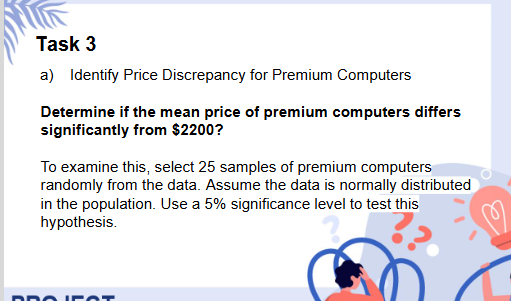

In [66]:
s_size=25 #sample size
alpha=0.05 # significance level is 5%
premium=df[df['premium']=='yes']
# since sample size is <30 and sd is unkown  we use t_test.
# we have to consider alpha/2 since it is a two edge test.
s_mean_data=premium['price'].sample(n=25,random_state=1)
s_mean=s_mean_data.mean()
s_sd=s_mean_data.std()
n=len(s_mean_data)
dof=n-1

In [68]:
p_mean=2200# given

In [70]:
import math
from scipy.stats import t 
t_statistics=(s_mean-p_mean)/(s_sd/math.sqrt(n))
t_critical=t.ppf(alpha/2,dof)
p_value=t.sf(abs(t_statistics),dof)*2

In [ ]:
# the decision rule
pvalue<alpha:reject null hypothesis
-t_critical>t_statistics>+t_critical:reject null hypothesis

In [74]:
t_critical>t_statistics

False

In [76]:
p_value<alpha

False

# since both the condition is false so as per decision rule we accept null hypothesis.

# the average price of a  computers which is premium does not  significantly  differ from $2200.

# 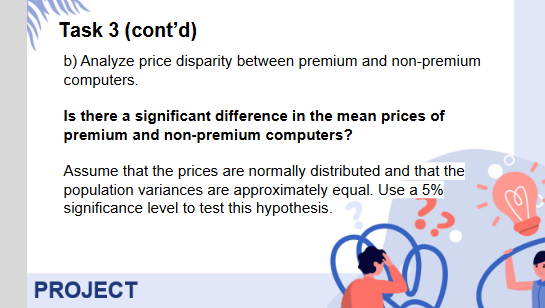

In [90]:
# PREMIUM COMPUTERS
premium=df[df['premium']=='yes'].price

#NON-PREMIUM COMPUTERS
non_premium=df[df['premium']=='no'].price

# sample size is unknown so we assume size of our own and sd is unknown so we take t_distribution.

In [100]:
# h0:there is no significant difference in the mean prices of premium and non-premium computers
# ha:there is significant difference between mean prices of premium and non-premium computers
# two tail distribution

In [94]:
import math

In [104]:
x1=premium.mean()
x2=non_premium.mean()
v1=(premium.std())**2
v2=(non_premium.std())**2
n1=len(premium)
n2=len(non_premium)
df=n1+n2-2
signal=abs(x1-x2)
noise=math.sqrt(v1*(n1-1)+v2*(n2-1))*math.sqrt(1/n1+1/n2)

In [118]:
t_statistics=signal/noise
t_critical=t.ppf((1-alpha/2),df)
p_value=t.sf(abs(t_statistics),df)*2
alpha=0.05# as per q sl

# decision rule:
# 1) if p_value<alpha: reject null hypothesis
# 2)if -tcitical>t_statistics>+t_critical : reject null hypothesis

In [121]:
t_statistics>t_critical

False

In [123]:
p_value<alpha/2

False

# so we accept the null hypothesis since it is false.so there is not a significant difference in the average  prices of  computers which are premium and non-premium.